## **import libraries**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## **Load the dataset**

In [3]:
df = pd.read_csv('Online Retail.csv', encoding='latin-1')


 # Encoding Categorical Variables

###  Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Country_Label'] = label_encoder.fit_transform(df['Country'])


### One-Hot Encoding

In [5]:
df_onehot = pd.get_dummies(df, columns=['Country'], prefix='Country')


### Ordinal Encoding

In [6]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df['Country_Ordinal'] = ordinal_encoder.fit_transform(df[['Country']])


###  Target Encoding

In [10]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['Country'])
df['Country_Target'] = target_encoder.fit_transform(df['Country'], df['UnitPrice'])

In [9]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00


### Frequency / Count Encoding

In [11]:
df['Country_Freq'] = df['Country'].map(df['Country'].value_counts())


###  Hash Encoding (Feature Hashing)

In [12]:
hash_encoder = ce.HashingEncoder(cols=['Country'], n_components=8)
df_hash = hash_encoder.fit_transform(df['Country'])


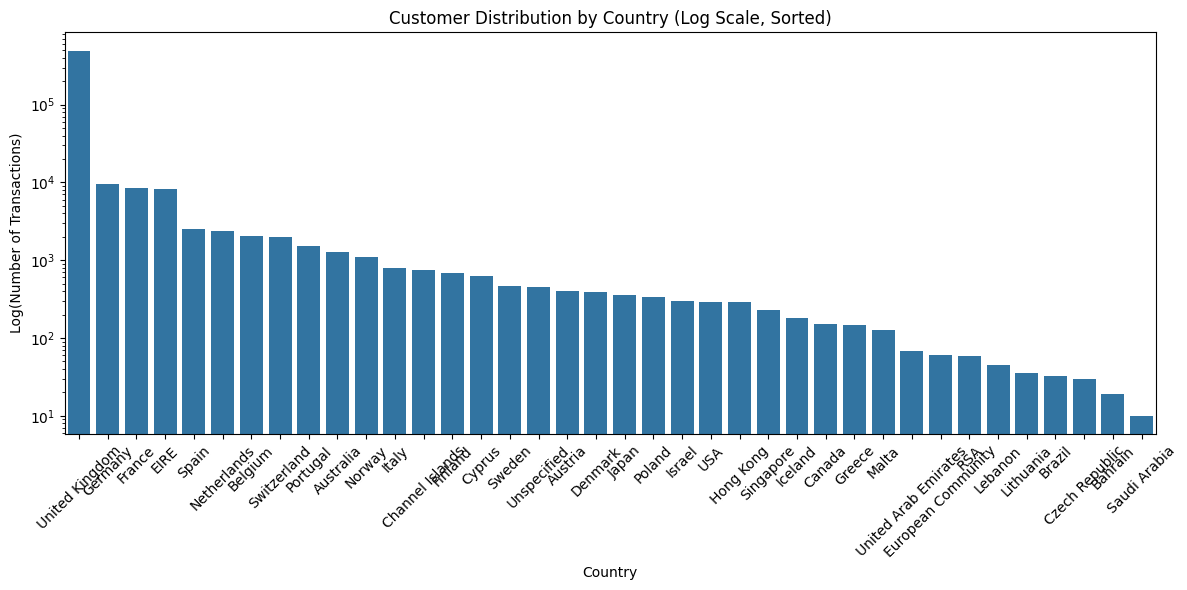

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get sorted country order based on actual counts
sorted_countries = df['Country'].value_counts().index

# Plot with sorted order
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Country', order=sorted_countries)
plt.yscale('log')  # Keep log scale if needed
plt.xticks(rotation=45)
plt.title('Customer Distribution by Country (Log Scale, Sorted)')
plt.xlabel('Country')
plt.ylabel('Log(Number of Transactions)')
plt.tight_layout()
plt.show()